In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import time

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

##### Part 1
Load the MNIST data, and split it into a training set, a validation set, and a test set (e.g., use 40,000 instances for training, 10,000 for validation, and 10,000 for testing, use random_state = 2017). Then train a Random Forest classifier, an Extra-Trees classifier, and an SVM. Next, try to combine them into an ensemble that outperforms them all on the validation set, using a soft and hard voting classifier. Once you have found one, try it on the test set. How much better does it perform compared to the individual classifiers?

### Load data

In [2]:
data = pd.read_csv('/Users/tWo/Documents/UTD/BUAN 6341 Machine Learning/Project 4/mnist_train.csv', header=None)
data.shape

(60000, 785)

### Display data

In [3]:
rename_col = ['label'] + list(range(784))
data.columns = rename_col
data.head()

,label,0,1,2,3,4,5,6,7,8,...,774,775,776,777,778,779,780,781,782,783
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Display digits

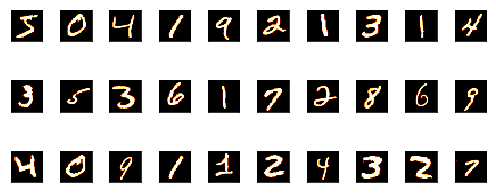

In [4]:
plt.figure(figsize=(7,7))
for i in range(0,30):
    plt.subplot(7,10, i+1)
    draw = data.iloc[i,1:]
    draw = np.array(draw, dtype='uint8')
    draw = draw.reshape((28,28))
    plt.imshow(draw, cmap='afmhot')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()

### Split data

In [5]:
X, Y = data.drop('label', axis=1), data['label']
x, x1, y, y1 = train_test_split(X, Y, test_size=20000, random_state=2017)
x_vali, x_test, y_vali, y_test = train_test_split(x1, y1, test_size=0.5, random_state=2017)
print('training size:', len(x))
print('validation size:', len(x_vali))
print('test size:', len(x_test))

training size: 40000
validation size: 10000
test size: 10000


### Random Forest
#### Model Building and Parameter Tuning

For min leaf size equals to 1
Training set score:   1.0 	 Validation set score: 0.9673
For min leaf size equals to 5
Training set score:   0.98905 	 Validation set score: 0.9601
For min leaf size equals to 10
Training set score:   0.974975 	 Validation set score: 0.9529
For min leaf size equals to 20
Training set score:   0.958975 	 Validation set score: 0.9456
For min leaf size equals to 40
Training set score:   0.942625 	 Validation set score: 0.9355


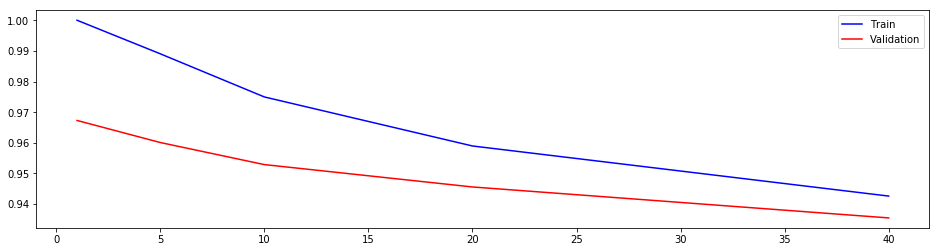

In [6]:
score_1 = []
score_2 = []
leafs = [1,5,10,20,40]
for leaf in leafs:
    rf = RandomForestClassifier(n_estimators=50, min_samples_leaf=leaf, random_state=2017)
    rf.fit(x, y)
    print('For min leaf size equals to', leaf)
    print('Training set score:  ', rf.score(x,y), '\t', 'Validation set score:', rf.score(x_vali, y_vali))
    score_1.append(rf.score(x,y))
    score_2.append(rf.score(x_vali, y_vali))

plt.figure(figsize=(16,4))
plt.plot(leafs, score_1, 'b')
plt.plot(leafs, score_2, 'r')
plt.legend(['Train', 'Validation'])
plt.show()

#### Prediction

In [7]:
rf = RandomForestClassifier(n_estimators=50, min_samples_leaf=1, random_state=2017)
rf.fit(x,y)
print('Using test set to check accuracy:', rf.score(x_test, y_test))

Using test set to check accuracy: 0.9629


### Extremely Randomized Trees
#### Model Building and Tuning Parameter

For estimator size equals to 10
Training set score:   1.0 	 Validation set score: 0.9456
For estimator size equals to 20
Training set score:   1.0 	 Validation set score: 0.9602
For estimator size equals to 30
Training set score:   1.0 	 Validation set score: 0.9647
For estimator size equals to 40
Training set score:   1.0 	 Validation set score: 0.9664
For estimator size equals to 50
Training set score:   1.0 	 Validation set score: 0.9681


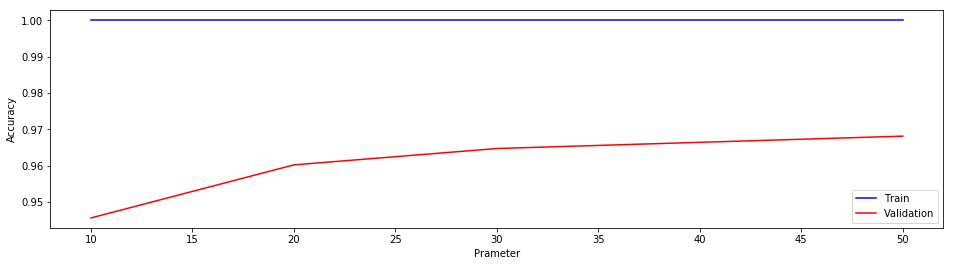

In [8]:
score_1 = []
score_2 = []
estimator = [10,20,30,40,50]
for est in estimator:
    et = ExtraTreesClassifier(n_estimators=est, random_state=2017)
    et.fit(x, y)
    print('For estimator size equals to', est)
    print('Training set score:  ', et.score(x,y), '\t', 'Validation set score:', et.score(x_vali, y_vali))
    score_1.append(et.score(x,y))
    score_2.append(et.score(x_vali, y_vali))

plt.figure(figsize=(16,4))
plt.plot(estimator, score_1, 'b')
plt.plot(estimator, score_2, 'r')
plt.legend(['Train', 'Validation'])
plt.ylabel('Accuracy')
plt.xlabel('Prameter')
plt.show()

#### Prediction

In [9]:
et = ExtraTreesClassifier(n_estimators=40, random_state=2017)
et.fit(x, y)
print('Using test set to check accuracy:', et.score(x_test, y_test))

Using test set to check accuracy: 0.9668


### SVM
#### Model Building and Parameter Tuning

The time complexity for SVM using "rbf" kernel bound is between $ O(dn^2)$ and $O(dn^3)$ where d represents the number of features and n represents the nubmer of instances. <br>
For training 1% of the training data which is 400 instances, the run time is about 1.2 seconds.<br>
Thus for training 40,000 instances, the run time will be $(100*t)^2$, which is roughly 14400 seconds, equivalents to 4 hours.<br>
So I decided to use only 4000 instances to build the model as I asked the professor.

In [10]:
a, drop1, b, drop2 = train_test_split(x, y, test_size=36000, random_state=2017)

In [11]:
svm = SVC(probability=True, random_state=2017)
start = time.time()
svm.fit(a, b)
end = time.time()
print('Training set score:  ', svm.score(a, b))
print('Training run time:   ', end-start)
print('Validation set score:', svm.score(x_vali, y_vali))
print('Testing set score:   ', svm.score(x_test, y_test))

Training set score:   1.0
Training run time:    135.63803386688232
Validation set score: 0.1156
Testing set score:    0.112


In [12]:
# score_1 = []
# score_2 = []
# gammas = np.logspace(-2,1,5)
# for gamma in gammas:
#     svm = SVC(gamma=gamma, random_state=2017)
#     svm.fit(x, y)
#     print('For estimator size equals to', leaf)
#     print('Training set score:  ', svm.score(x,y), '\t', 'Validation set score:', svm.score(x_vali, y_vali))
#     score_1.append(svm.score(x,y))
#     score_2.append(svm.score(x_vali, y_vali))

# plt.figure(figsize=(16,4))
# plt.plot(gammas, score_1, 'b')
# plt.plot(gammas, score_2, 'r')
# plt.legend(['Train', 'Validation'])
# plt.ylabel('Accuracy')
# plt.xlabel('Prameter')
# plt.show()

### Ensemble
Because the voting classifier needs to fit the x and y again. The SVM will take probably too long to get the result and it does not perform well, so here I only use Random Forest and Extra-Tree to be the estimators.
#### Soft Voting

In [13]:
soft = VotingClassifier(estimators=[('rf',rf),('et',et)], voting='soft')
soft.fit(x,y)
print('Training set score:  ', soft.score(x, y))
print('Validation set score:', soft.score(x_vali, y_vali))
print('Testing set score:   ', soft.score(x_test, y_test))

Training set score:   1.0
Validation set score: 0.9709
Testing set score:    0.9689


#### Hard Voting

In [14]:
hard = VotingClassifier(estimators=[('rf',rf),('et',et)], voting='hard')
hard.fit(x,y)
print('Training set score:  ', hard.score(x, y))
print('Validation set score:', hard.score(x_vali, y_vali))
print('Testing set score:   ', hard.score(x_test, y_test))

Training set score:   1.0
Validation set score: 0.9657
Testing set score:    0.9642


The best result is softing method, the test set has accuracy of 0.9689 which is bettr than the individual classifier Extra-tree which is 0.9668. So here I will choose soft voting as the final classifier.

#### To include SVM, code is here

In [ ]:
# soft = VotingClassifier(estimators=[('rf',rf),('et',et),('svm',svm)], voting='soft')
# soft.fit(x,y)
# print('Training set score:  ', soft.score(x, y))
# print('Validation set score:', soft.score(x_vali, y_vali))
# print('Testing set score:   ', soft.score(x_test, y_test))

# hard = VotingClassifier(estimators=[('rf',rf),('et',et),('svm',svm)], voting='hard')
# hard.fit(x,y)
# print('Training set score:  ', hard.score(x, y))
# print('Validation set score:', hard.score(x_vali, y_vali))
# print('Testing set score:   ', hard.score(x_test, y_test))

##### Part 2
On MNIST dataset with above split, train a Random Forest classifier on the dataset and time how long it takes, then evaluate the resulting model on the test set. Next, use PCA to reduce the dataset’s dimensionality, with an explained variance ratio of 95%. Train a new Random Forest classifier on the reduced dataset and see how long it takes. Was training much faster? Next evaluate the classifier on the test set: how does it compare to the previous classifier?

#### Train the model and record timespan

In [15]:
rf = RandomForestClassifier(random_state=2017)

# scale = MinMaxScaler((1,10))
# scale.fit(x)
# x_scale = scale.transform(x)
# x_vali_scale = scale.transform(x_vali)
# x_test_scale = scale.transform(x_test)

start = time.time()
rf.fit(x,y)
end = time.time()

print('Train set score:', rf.score(x,y))
print('Validation set score:', rf.score(x_vali, y_vali))
print('Test set score:', rf.score(x_test, y_test))
print('')
print('Time spent on training the model ---- {:.8f} seconds ----'.format(end-start))

Train set score: 0.998925
Validation set score: 0.9451
Test set score: 0.94

Time spent on training the model ---- 2.41157293 seconds ----


#### Implementing PCA

---------------------------------------------------------------------------------------------------------
After fitting x with PCA, the variance in percentage kept is 0.332612655196
By keeping 0.33 variance, we have 5 principle components for training the model

Building Random Forest using PCA transformed x

Time spent on training the model ---- 0.97151923 seconds ----

Train set score: 0.9878
Validation set score: 0.7337
Test set score: 0.7301

---------------------------------------------------------------------------------------------------------
After fitting x with PCA, the variance in percentage kept is 0.509515673827
By keeping 0.51 variance, we have 11 principle components for training the model

Building Random Forest using PCA transformed x

Time spent on training the model ---- 1.33921790 seconds ----

Train set score: 0.99675
Validation set score: 0.8903
Test set score: 0.8852

------------------------------------------------------------------------------------------------

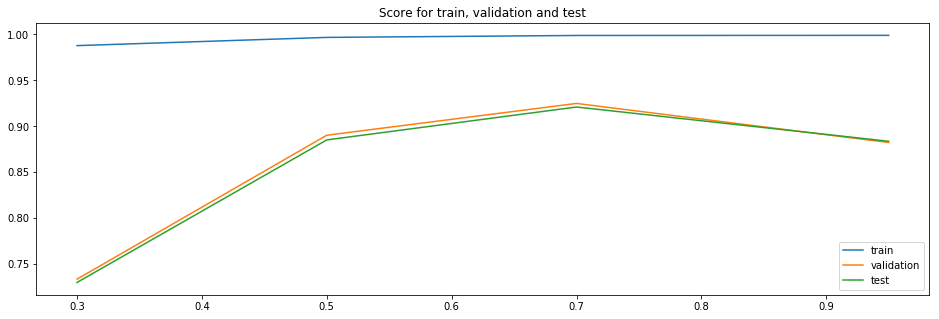

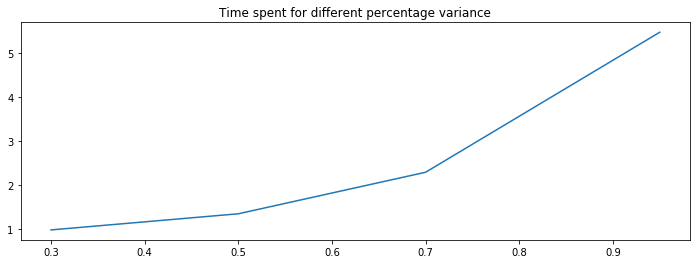

In [16]:
timespan = []
trai_score = []
vali_score = []
test_score = []
n_comp = [0.3, 0.5, 0.7, 0.95]
for i in n_comp:
    pca = PCA(n_components=i, random_state=2017)
    pca.fit(x)
    x_t = pca.transform(x)
    print('---------------------------------------------------------------------------------------------------------')
    print('After fitting x with PCA, the variance in percentage kept is', sum(pca.explained_variance_ratio_))
    print('By keeping {:.2f} variance, we have {} principle components for training the model'
          .format(sum(pca.explained_variance_ratio_), pca.n_components_))
    x_vali_t = pca.transform(x_vali)
    x_test_t = pca.transform(x_test)

    # scale.fit(x_t)
    # x_t_scale = scale.transform(x_t)
    # x_vali_t_scale = scale.transform(x_vali_t)
    # x_test_t_scale = scale.transform(x_test_t)


    print('\nBuilding Random Forest using PCA transformed x')
    start = time.time()
    rf.fit(x_t, y)
    end = time.time()
    print('\nTime spent on training the model ---- {:.8f} seconds ----'.format(end-start))

    print('\nTrain set score:', rf.score(x_t,y))
    print('Validation set score:', rf.score(x_vali_t, y_vali))
    print('Test set score:', rf.score(x_test_t, y_test))
    print('')
    
    timespan.append(end-start)
    trai_score.append(rf.score(x_t,y))
    vali_score.append(rf.score(x_vali_t, y_vali))
    test_score.append(rf.score(x_test_t, y_test))

plt.figure(figsize=(16,5))
plt.plot(n_comp, trai_score)
plt.plot(n_comp, vali_score)
plt.plot(n_comp, test_score)
plt.title('Score for train, validation and test')
plt.legend(['train', 'validation', 'test'])
plt.show()

plt.figure(figsize=(12,4))
plt.plot(n_comp, timespan)
plt.title('Time spent for different percentage variance')
plt.show()

### Time complexity for Random Forest

O( v * n log(n) )

Where v represents variables and n represents observations. <br>
Varaibles droped from 785 to 153 applying the PCA with 95% explained variance.<br>
The time spent should be reduced. <br>
However, the result shows that after PCA (95%) the time spent on training the model is greater than the original model building.


The best accuracy is before PCA using the random forest, which is about 94%. After the PCA, accuracy does not get a better result. This may be because the Random Forest is already built a very good model that further feature manipulation cannot improve it anymore as some information will be lost by using PCA.